In [2]:
def display_board(board, flipped = False):
    clear_output(wait = True)
    display(SVG(chess.svg.board(board = board, size = 350, flipped = flipped)))

In [3]:
def get_human_move(board):
    legal_moves = [move.uci() for move in board.legal_moves]
    while True:
        move = input("Enter your move (e.g., e2e4): ")
        if move in legal_moves:
            return move
        else:
            print("Invalid move. Try again.")

In [4]:
def get_random_move(board):
    legal_moves = [move.uci() for move in board.legal_moves]
    return random.choice(legal_moves)

In [5]:
def play_game():
    board = chess.Board()
    display_board(board)
    
    # Game loop
    while not board.is_game_over():
        move = get_random_move(board) if board.turn == chess.WHITE else get_random_move(board)
        
        if move:
            board.push_uci(move)
        
        display_board(board)
    
    # Game over
    result = board.result()
    if result == "1-0":
        print("White wins!")
    elif result == "0-1":
        print("Black wins!")
    else:
        print("It's a draw!")

In [6]:
def play_puzzle(board, moves):
    delay = 1
    flipped = board.turn == chess.BLACK
    display_board(board, flipped = flipped)
    
    # Puzzle loop
    for i, move in enumerate(moves):
        human_turn = i % 2 == 0
        
        if human_turn:
            human_move = get_human_move(board)
            while human_move != move:
                print("Wrong move. Try again.")
                human_move = get_human_move(board)
        
        board.push_uci(move)
        display_board(board, flipped = flipped)
        time.sleep(delay)
    
    # Puzzle over
    print("Puzzle solved!")
    time.sleep(delay)

In [7]:
puzzles = [
    # Advanced Pawn
    ('8/1k5P/7R/1p4K1/1P2P1P1/7r/p7/8 b',['h3h6','g5h6','a2a1q']),
    ('4B3/6pk/2P2p1p/B3p3/8/7P/3p1P2/2r2RK1 b',['c1f1','g1f1','d2d1q']),
    ('3r3k/ppP3bp/6p1/4pp2/1P2P3/5R2/P5PP/2q2b1K w',['c7d8q','g7f8','d8f8']),
    ('8/4K3/4p3/4P3/2Rp4/3k4/8/8 b',['d3c4','e7e6','d4d3','e6f7','d3d2','e5e6','d2d1q']),
    # Deflection
    ('8/1p3r1p/p1pRbB2/2P1Pk2/P2Pp3/4K3/6P1/8 w',['g2g4','f5g4','d6e6']),
    ('8/1p3k1n/p3p2p/3pP2P/3P1N2/1P3K1B/P2b4/8 b',['h7g5','f3e2','d2f4']),
    ('k1q3nr/prp2pb1/2Q3pp/N1p5/4P3/2N4P/PPP2PP1/2KR4 w',['d1d8','c8d8','c6b7']),
    ('1Q4R1/3rqk1p/5pn1/4p3/8/6PP/P4P1K/8 w',['b8b3','e7e6','g8g7','f7g7','b3e6']),
    # Fork
    ('1r5k/6p1/5p2/4p2p/RP1n3P/6P1/3B1P2/6K1 b',['d4f3','g1f1','f3d2']),
    ('7k/4p2p/p1pq2pb/8/2QP2n1/2P3P1/PP5P/5RK1 b',['g4e3','c4a6','e3f1']),
    ('1rbqk2r/pp3ppp/4pn2/3p4/1bPP4/2N5/PP3PPP/R2QKBNR w',['d1a4','b7b5','a4b4']),
    ('r2q1rk1/pp3ppp/3bpn2/3pn3/3P4/3Q4/PPP2PPP/RNB1R1K1 w',['d4e5','d6c5','e5f6']),
    # Hanging Piece
    ('3r1rk1/ppp2pp1/2n4p/2q1pbQ1/8/3P1N2/PPP1BPPP/2R2RK1 w',['g5f5']),
    ('2R3k1/pp4p1/6Q1/1P1pr1q1/1B1P1p2/P6b/5PPP/6K1 b',['h3c8','g6g5','e5g5']),
    ('R3r2k/6p1/p7/7p/4p1q1/1P2P1P1/P4PQ1/3R2K1 b',['g4d1','g2f1','d1f1','g1f1','e8a8']),
    ('r1b2rk1/pp3pp1/1q1bp2p/3p4/1n1P1P2/1N2nN2/PPB3PP/R1BQ1RK1 w',['c1e3','b4c2','d1c2']),
    # Mate in 1
    ('1r5k/R7/3p2nN/3Pb1N1/4P3/2p5/5K2/8 w',['a7h7']),
    ('1R6/7p/1p1k2b1/3P4/1PPK4/4r1PP/8/8 b',['e3d3']),
    ('2k5/ppp5/6Qp/P3pr2/8/2Pp2P1/1P3qPP/6RK w',['g6e8']),
    ('6k1/5p1p/1pr5/2PKbBp1/1p1pP3/6P1/1P3P1P/3R4 b',['c6c5']),
    # Mate in 2+
    ('4R3/8/8/P1p3p1/2B5/4Pk2/1r4r1/2R1K3 b',['g2g1','c4f1','b2e2','e1d1','g1f1']),
    ('rn2r1k1/pp3pp1/3b3p/2pp4/6q1/P2PPN2/1P2BP2/R1BQ2RK b',['g4h3','f3h2','h3h2']),
    ('r2qk2r/1pp1np1p/3p1p2/1pbNp3/4P3/3P1P1P/PPPQ1P2/R4RK1 w',['d5f6','e8f8','d2h6']),
    ('6k1/pp1n1ppp/2pq4/3n1Q2/5R2/1P5P/P1P3PK/8 w',['f5f7','g8h8','f7e8','d7f8','e8f8','d6f8','f4f8']),
    # Pin
    ('6k1/6p1/4q1P1/8/2p5/8/4BPPP/4R1K1 w',['e2c4','e6c4','e1e8']),
    ('8/1k6/4P3/8/8/1B1K4/8/7b w',['e6e7','h1c6','b3d5','c6d5','e7e8q']),
    ('5rk1/pppn3p/4p1p1/3pP3/3P1r2/2P2NqP/PP2Q1P1/4RRK1 b',['f4f3','f1f3','f8f3']),
    ('3k2r1/p4Qb1/1pb5/8/3p4/3P4/PPr3PP/R5KR b',['c2g2','g1f1','g8f8','f7f8','g7f8']),
    # Skewer
    ('3R4/5pkp/6p1/1p6/1Pn5/1K3Q2/r7/8 b',['a2a3','b3c2','a3f3']),
    ('8/8/8/r6P/3k4/8/3K1P2/7Q b',['a5a2','d2e1','a2a1','e1e2','a1h1']),
    ('2r2rk1/pb3ppp/4p3/p3N3/3Pp3/P3P2P/1q3PP1/R2Q1RK1 w',['a1b1','b2a3','b1b7']),
    ('8/5pk1/3p4/p1b5/Pp5P/8/1qP3P1/3Q1K1R b',['b2f6','d1f3','f6a1','f1e2','a1h1']),
]

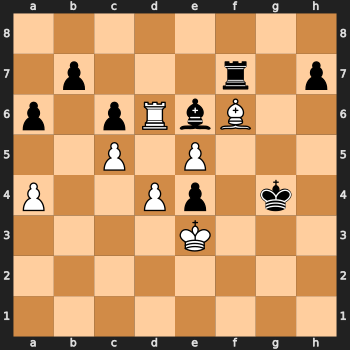

KeyboardInterrupt: Interrupted by user

In [8]:
for puzzle in puzzles[4:8]:
    board = chess.Board(puzzle[0])
    moves = puzzle[1]
    play_puzzle(board, moves)

In [1]:
import chess
import chess.svg
import pygame
import random
import sys
import time
from cairosvg import svg2png

# Initialize Pygame
pygame.init()

# Set up the display
board_size = 400
screen = pygame.display.set_mode((board_size, board_size))
clock = pygame.time.Clock()

# Initialize variables
board = chess.Board()
from_square = None
move = chess.Move.null()

# Game loop
running = True
while running:
    if board.turn == chess.WHITE:
        # Make random CPU move
        move = random.choice(list(board.legal_moves))
        board.push(move)
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        
        if event.type == pygame.MOUSEBUTTONDOWN:
            # Get the mouse position
            x, y = pygame.mouse.get_pos()
            
            # Convert the position to chess coordinates
            file = x // (board_size // 8)
            rank = 7 - y // (board_size // 8)
            square = chess.square(file, rank)
            
            # Determine move
            if from_square is None and board.color_at(square) == board.turn:
                from_square = square
            elif from_square == square:
                from_square = None
            else:
                # Make the move if it's legal
                try:
                    move = board.find_move(from_square, square)
                except:
                    from_square = square if board.color_at(square) == board.turn else None
                else:
                    board.push(move)
                    from_square = None
    
    # End game
    if board.is_game_over():
        running = False
    
    # Convert board.svg to board.png
    drawing = chess.svg.board(
        board,
        lastmove = move,
        fill = {from_square: "#cc0000cc"},
        size = board_size,
        coordinates = False
    )
    f = open("board.svg", 'w')
    f.write(drawing)
    svg2png(url = "board.svg", write_to = "board.png")
    
    # Display board.png
    board_image = pygame.image.load("board.png")
    screen.blit(board_image, (0, 0))
    pygame.display.flip()
    
    # Set framerate
    clock.tick(60)

# Quit Pygame
pygame.quit()

pygame 2.4.0 (SDL 2.26.4, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
!pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.0
anaconda-navigator==2.3.1
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/Windows/TEMP/abs_b0dtxgpicv/croots/recipe/astroid_1659023126745/work
astropy @ file:///C:/ci/astropy_1657719656942/work
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functoo